In [13]:
import geopandas as gpd

In [1]:
ROAD = 'roadIndonesia.geojson'
URBAN = 'urbanizationIndonesia.geojson'
CELLTOWER = 'cellTower.csv'

In [4]:
road_data = gpd.read_file(ROAD)
road_data

,OBJECTID,ID,Category,Shape__Length,geometry
0,1,1,primary,288.246389,"LINESTRING (107.61060 -6.90718, 107.61062 -6.9..."
1,2,2,secondary,616.740548,"LINESTRING (107.60446 -6.90715, 107.60448 -6.9..."
2,3,3,secondary,150.996594,"LINESTRING (107.60794 -6.90651, 107.60836 -6.9..."
3,4,4,primary,206.762654,"LINESTRING (107.60739 -6.90766, 107.60734 -6.9..."
4,5,5,primary,48.283881,"LINESTRING (107.59763 -6.90645, 107.59805 -6.9..."
...,...,...,...,...,...
123552,123553,123553,primary,1110.174713,"LINESTRING (106.80809 -6.27818, 106.80811 -6.2..."
123553,123554,123554,primary,246.566367,"LINESTRING (106.80850 -6.26819, 106.80847 -6.2..."
123554,123555,123555,secondary,182.139042,"LINESTRING (106.88935 -6.18901, 106.88978 -6.1..."
123555,123556,123556,tertiary,1046.668749,"LINESTRING (110.99810 -7.25042, 110.99663 -7.2..."


In [5]:
road_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

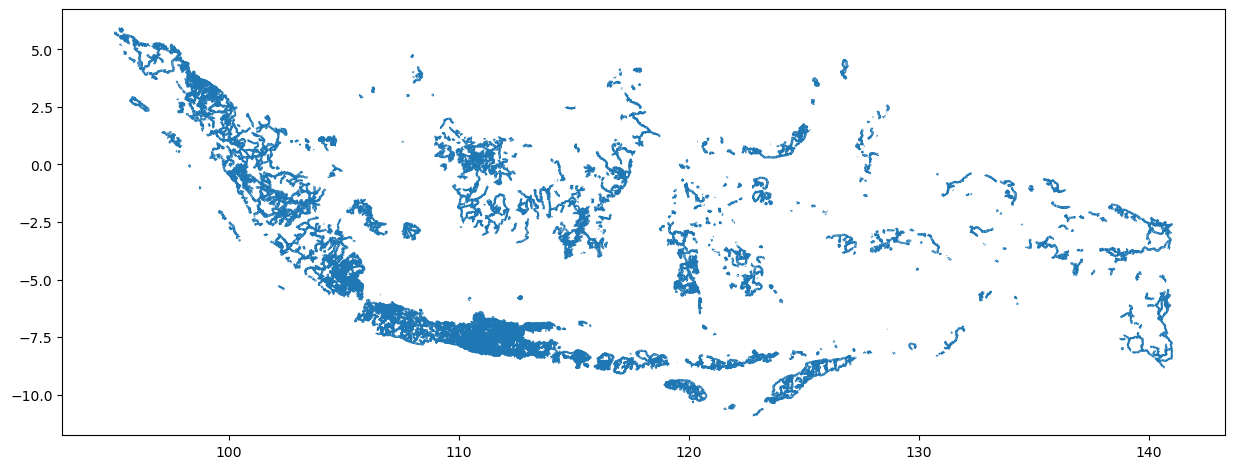

In [6]:
import matplotlib.pyplot as plt

road_data.plot(figsize=(15, 10))

In [15]:
import json
with open('jawaTimur.json') as f:
    jatim_topo = json.load(f)

In [16]:
jatim_topo['objects']['IDN_adm_2_kabkota'].keys()

dict_keys(['type', 'geometries'])

In [17]:
jatim_topo['objects']['IDN_adm_2_kabkota']['geometries'][0]['properties']['NAME_0']

'Indonesia'

In [18]:
import geopandas as gpd
df_jatim = gpd.read_file('jawaTimur.json')
df_jatim.head()

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,VARNAME_2,NL_NAME_2,HASC_2,CC_2,TYPE_2,ENGTYPE_2,VALIDFR_2,VALIDTO_2,REMARKS_2,Shape_Leng,Shape_Area,geometry
0,None,103,IDN,Indonesia,1265,Jawa Timur,15451,Bangkalan,None,None,ID.JI.BK,None,Kabupaten,Regency,Unknown,Present,None,1.818715,0.106544,"POLYGON ((113.12778 -6.89308, 113.12778 -6.900..."
1,None,103,IDN,Indonesia,1265,Jawa Timur,15452,Banyuwangi,None,None,ID.JI.BW,None,Kabupaten,Regency,Unknown,Present,None,4.092364,0.293183,"POLYGON ((114.42055 -7.92872, 114.42510 -7.933..."
2,None,103,IDN,Indonesia,1265,Jawa Timur,15453,Batu,Kota Batu,None,ID.JI.BA,None,Kotamadya,Municipality,Unknown,Present,None,0.669420,0.015645,"POLYGON ((112.58495 -7.76116, 112.57566 -7.783..."
3,None,103,IDN,Indonesia,1265,Jawa Timur,15454,Blitar,None,None,ID.JI.BM,None,Kotamadya,Municipality,Unknown,Present,None,2.133740,0.145031,"POLYGON ((112.35033 -8.34554, 112.34577 -8.342..."
4,None,103,IDN,Indonesia,1265,Jawa Timur,15455,Bojonegoro,None,None,ID.JI.BJ,None,Kabupaten,Regency,Unknown,Present,None,2.584401,0.191972,"POLYGON ((112.15251 -7.11006, 112.15706 -7.116..."


<AxesSubplot:xlabel='X', ylabel='Y'>

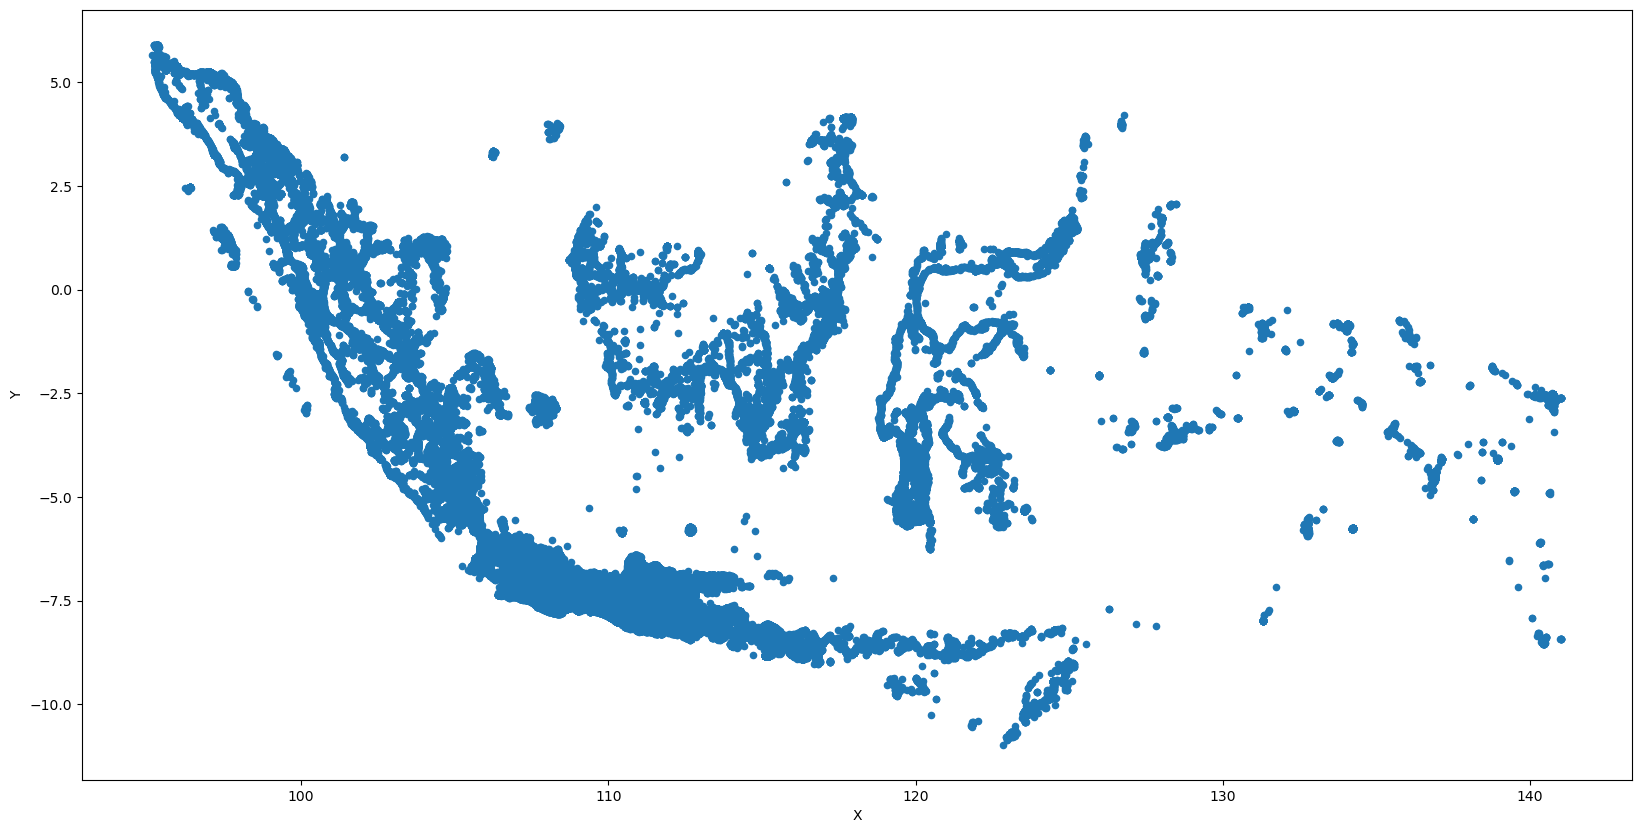

In [41]:
import pandas as pd
celltower = pd.read_csv(CELLTOWER)
celltower.plot.scatter(x='X', y='Y', figsize=(20,10))

In [42]:
celltower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086292 entries, 0 to 1086291
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   X         1086292 non-null  float64
 1   Y         1086292 non-null  float64
 2   OBJECTID  1086292 non-null  int64  
 3   ID        1086292 non-null  int64  
 4   mcc       1086292 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 41.4 MB


In [20]:
import pandas as pd
celltower = pd.read_csv(CELLTOWER)
celltower['X'] = celltower['X'].astype('float')
celltower['Y'] = celltower['Y'].astype('float')
celltower = celltower[celltower['X'] > 110.7]
celltower = celltower[celltower['X'] < 114.8]
celltower = celltower[celltower['Y'] < -6.7]
celltower = celltower[celltower['Y'] > -9]
celltower

,X,Y,OBJECTID,ID,mcc
651938,112.526779,-8.398495,651939,651939,510
651939,112.535178,-8.402980,651940,651940,510
651940,112.535019,-8.402481,651941,651941,510
651941,112.535706,-8.403168,651942,651942,510
651942,112.539139,-8.402481,651943,651943,510
...,...,...,...,...,...
989254,114.568906,-7.154476,989255,989255,510
989255,114.571383,-7.152907,989256,989256,510
989256,114.600815,-7.143797,989257,989257,510
989257,114.613541,-7.147915,989258,989258,510


<AxesSubplot:xlabel='X', ylabel='Y'>

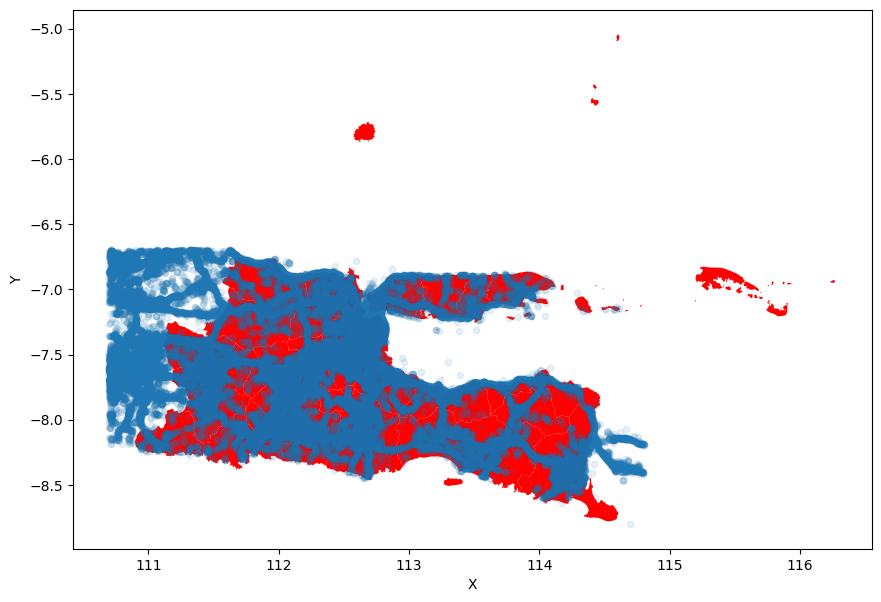

In [21]:
ax = df_jatim.plot(color="red", figsize=(17,7))
celltower.plot.scatter('X', 'Y', ax=ax, alpha=0.1)

In [22]:
from shapely.geometry import Point, Polygon, MultiPolygon

point_data = [Point(xy) for xy in zip(celltower['X'], celltower['Y'])]

polygo = df_jatim.geometry

In [23]:
from shapely.ops import unary_union

polygons = polygo.to_list()
polygons[0].contains(point_data[0])

False

<AxesSubplot:>

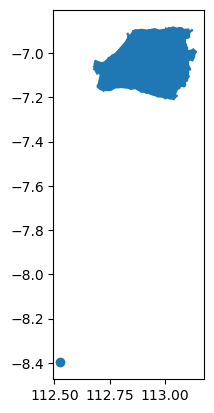

In [24]:
ax = gpd.GeoSeries(point_data[0]).plot()
gpd.GeoSeries(polygons[0]).plot(ax = ax)

In [25]:
df_jatim[df_jatim.geometry.is_valid == False]

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,VARNAME_2,NL_NAME_2,HASC_2,CC_2,TYPE_2,ENGTYPE_2,VALIDFR_2,VALIDTO_2,REMARKS_2,Shape_Leng,Shape_Area,geometry
6,None,103,IDN,Indonesia,1265,Jawa Timur,15457,Gresik,None,None,ID.JI.GR,None,Kabupaten,Regency,Unknown,Present,None,3.394640,0.102305,"MULTIPOLYGON (((112.64943 -7.19721, 112.63103 ..."
26,None,103,IDN,Indonesia,1265,Jawa Timur,15477,Pamekasan,None,None,ID.JI.PK,None,Kabupaten,Regency,Unknown,Present,None,1.330653,0.065463,"POLYGON ((113.63854 -6.88797, 113.63854 -6.896..."
33,None,103,IDN,Indonesia,1265,Jawa Timur,15484,Sumenep,None,None,ID.JI.SM,None,Kabupaten,Regency,Unknown,Present,None,9.881176,0.173792,"MULTIPOLYGON (((113.75348 -7.20578, 113.76260 ..."


In [26]:
from shapely.validation import make_valid

df_jatim['geometry'].iloc[6] = make_valid(df_jatim['geometry'].iloc[6])
df_jatim['geometry'].iloc[26] = make_valid(df_jatim['geometry'].iloc[26])
df_jatim['geometry'].iloc[33] = make_valid(df_jatim['geometry'].iloc[33])

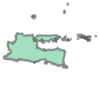

In [27]:
df_jatim.geometry.unary_union

In [30]:
pol_gpd = gpd.GeoDataFrame()
pol_gpd['geometry'] = None
pol_gpd.loc[0, 'geometry'] = df_jatim.geometry.unary_union

In [31]:
celltower_gpd = gpd.GeoSeries(point_data)
celltower_gpd = gpd.GeoDataFrame(geometry=celltower_gpd)
celltower_gpd

,geometry
0,POINT (112.52678 -8.39850)
1,POINT (112.53518 -8.40298)
2,POINT (112.53502 -8.40248)
3,POINT (112.53571 -8.40317)
4,POINT (112.53914 -8.40248)
...,...
168053,POINT (114.56891 -7.15448)
168054,POINT (114.57138 -7.15291)
168055,POINT (114.60082 -7.14380)
168056,POINT (114.61354 -7.14792)


In [32]:
dat_fin = gpd.sjoin(celltower_gpd, pol_gpd, op='within')

d:\Anaconda3\envs\GIS-ML\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [33]:
dat_fin

,geometry,index_right
0,POINT (112.52678 -8.39850),0
4,POINT (112.53914 -8.40248),0
7,POINT (112.56358 -8.40440),0
8,POINT (112.57346 -8.40455),0
9,POINT (112.57622 -8.40935),0
...,...,...
168053,POINT (114.56891 -7.15448),0
168054,POINT (114.57138 -7.15291),0
168055,POINT (114.60082 -7.14380),0
168056,POINT (114.61354 -7.14792),0


<AxesSubplot:>

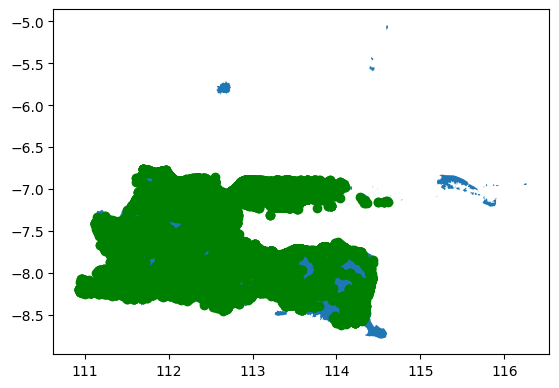

In [39]:
ax = pol_gpd.plot()
dat_fin.plot(color='green', figsize=(50,10), ax = ax)


In [27]:
dat_fin['geometry'].x

0         112.526779
4         112.539139
7         112.563583
8         112.573462
9         112.576218
             ...    
168053    114.568906
168054    114.571383
168055    114.600815
168056    114.613541
168057    114.587929
Length: 134059, dtype: float64

In [32]:
x = pd.DataFrame(dat_fin['geometry'].x, columns=['X'])
y = pd.DataFrame(dat_fin['geometry'].y, columns=['Y'])
final_celltower = pd.concat([x, y], axis=1)
final_celltower

,X,Y
0,112.526779,-8.398495
4,112.539139,-8.402481
7,112.563583,-8.404404
8,112.573462,-8.404549
9,112.576218,-8.409348
...,...,...
168053,114.568906,-7.154476
168054,114.571383,-7.152907
168055,114.600815,-7.143797
168056,114.613541,-7.147915


In [33]:
final_celltower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134059 entries, 0 to 168057
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       134059 non-null  float64
 1   Y       134059 non-null  float64
dtypes: float64(2)
memory usage: 7.1 MB


In [34]:
final_celltower.to_csv('cellTower_Jatim.csv')